In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as ltb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
X_train = pd.read_csv("/content/drive/MyDrive/ML Projects/Cancer Prediction/Cancer_pred_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/ML Projects/Cancer Prediction/Cancer_pred_test.csv")

In [7]:
y_train = np.load("/content/drive/MyDrive/ML Projects/Cancer Prediction/y_train_final_ff.npy",allow_pickle=True)
y_test = np.load("/content/drive/MyDrive/ML Projects/Cancer Prediction/y_test_final_ff.npy",allow_pickle=True)

In [8]:
X_train.drop(["Unnamed: 0"], axis = 1, inplace = True)
X_test.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [9]:
X_train.shape,X_test.shape

((2656, 1025), (665, 1025))

# Confusion matrix, Precision, Recall

In [16]:
def confusion_precision_recall(y_actual, y_predict):
    '''
    This function plots the confusion matrix, recall & precision
    
    '''
    C = confusion_matrix(y_actual, y_predict)     
    
    precision =(C/C.sum(axis=0)) # dividing each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    # sum of column elements = 1
    
    recall =(((C.T)/(C.sum(axis=1))).T) # dividing each element of the confusion matrix with the sum of elements in that row
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    

    labels = [1,2,3,4,5,6,7,8,9] # since we have 9 classes

    # Confusion Matrix
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    plt.figure(figsize=(20,5))
    sns.heatmap(precision, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Precision Matrix')
    plt.show()
    
    plt.figure(figsize=(20,5))
    sns.heatmap(recall, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Recall Matrix')
    plt.show()

# Balancing the imbalance data

In [10]:
weights = {1: 0.6500244738130201,
 2: 0.8174823022468451,
 3: 4.156494522691705,
 4: 0.5375430074883627,
 5: 1.5211912943871706,
 6: 1.3414141414141414,
 7: 0.3872849227179936,
 8: 19.674074074074074,
 9: 9.837037037037037}

# Decision Trees

In [11]:
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={1: 0.6500244738130201,
                                     2: 0.8174823022468451,
                                     3: 4.156494522691705,
                                     4: 0.5375430074883627,
                                     5: 1.5211912943871706,
                                     6: 1.3414141414141414,
                                     7: 0.3872849227179936,
                                     8: 19.674074074074074,
                                     9: 9.837037037037037})

Since the classes are balanced now, we use micro 
as it; Calculate metrics globally by counting the total true positives, false negatives and false positives.

In [12]:
dt_train_predict = model.predict(X_train)
dt_test_predict = model.predict(X_test)

In [13]:
dt_train_recall = recall_score(y_train,dt_train_predict,average='micro')
dt_test_recall = recall_score(y_test,dt_test_predict,average='micro')

In [14]:
print("Recall score Decision Tree :{}".format(dt_test_recall))

Recall score Decision Tree :0.33533834586466166


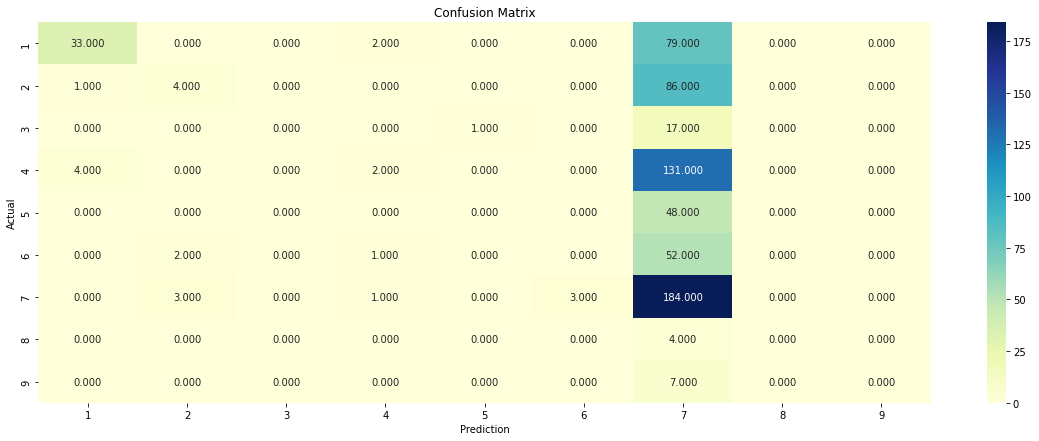

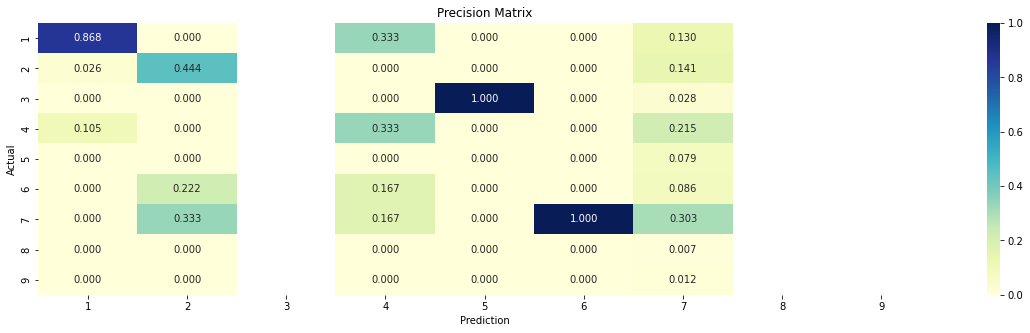

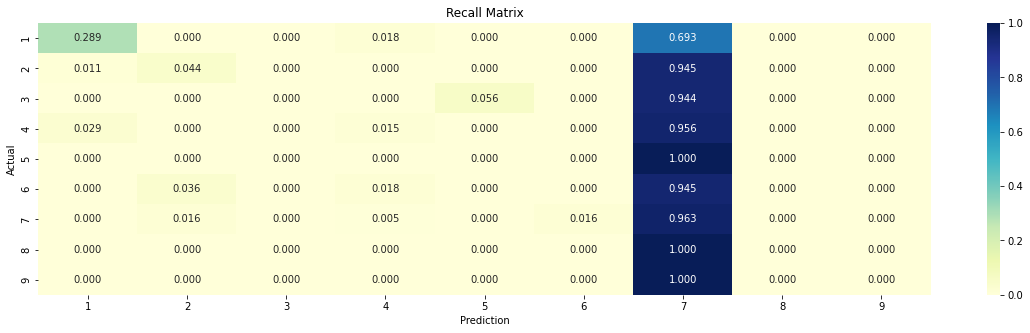

In [17]:
confusion_precision_recall(y_test,dt_test_predict)

# Random Forest:

In [18]:
rf_best = RandomForestClassifier(class_weight=weights)
rf_best.fit(X_train,y_train)

RandomForestClassifier(class_weight={1: 0.6500244738130201,
                                     2: 0.8174823022468451,
                                     3: 4.156494522691705,
                                     4: 0.5375430074883627,
                                     5: 1.5211912943871706,
                                     6: 1.3414141414141414,
                                     7: 0.3872849227179936,
                                     8: 19.674074074074074,
                                     9: 9.837037037037037})

In [19]:
rf_test_predict = rf_best.predict(X_test)

In [20]:
rf_test_recall = recall_score(y_test,rf_test_predict,average='micro')

In [21]:
print("Recall score Random Forest :{}".format(rf_test_recall))

Recall score Random Forest :0.6721804511278195


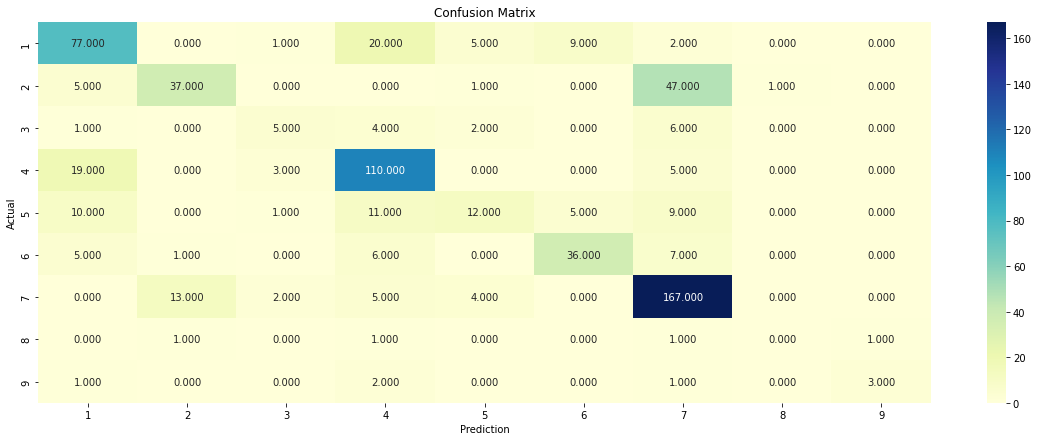

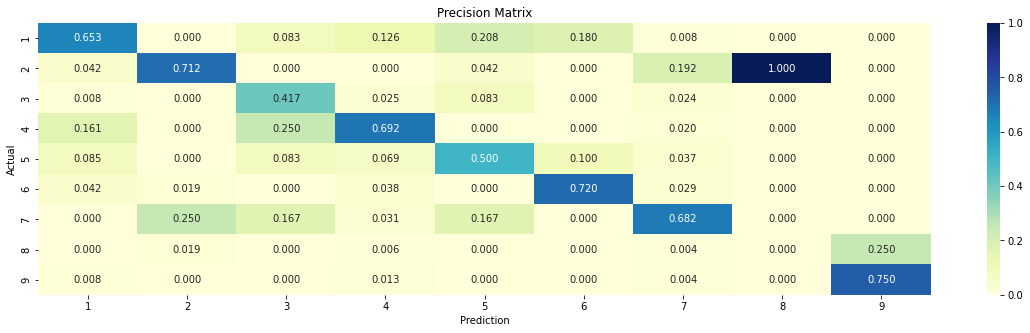

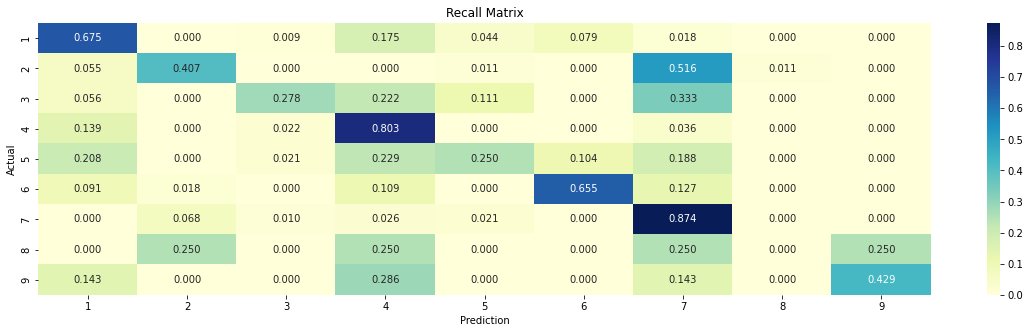

In [22]:
confusion_precision_recall(y_test,rf_test_predict)

# XGboost

In [23]:
classifier = xgb.XGBClassifier(class_weight=weights,random_state = 0)
classifier.fit(X_train,y_train)

xgboost_pred_test = classifier.predict(X_test)

In [24]:
xgb_test_recall = recall_score(y_test,xgboost_pred_test,average='micro')

In [25]:
print("Recall score XGBoost :{}".format(xgb_test_recall))

Recall score XGBoost :0.41353383458646614


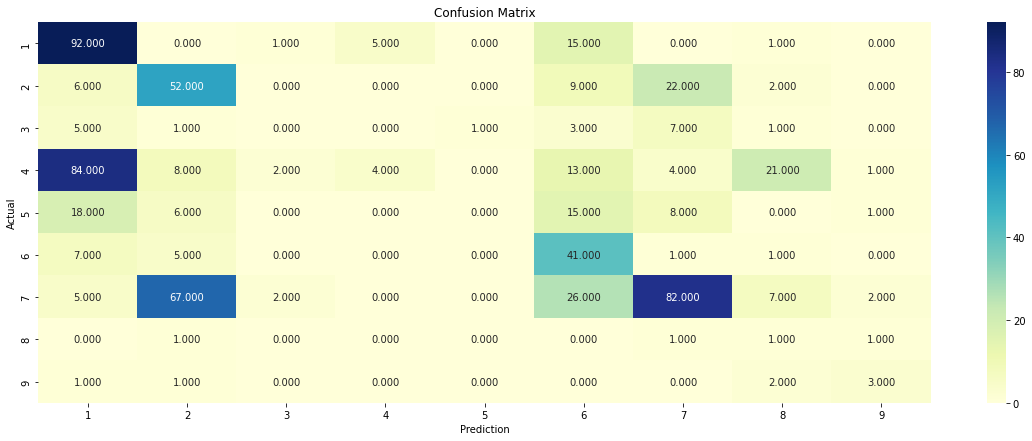

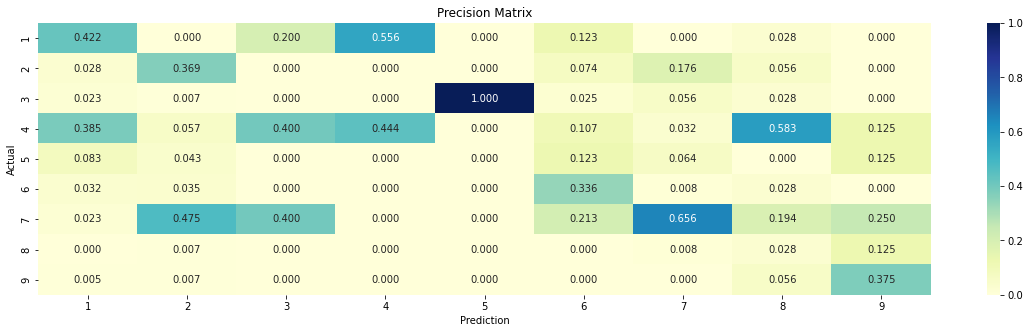

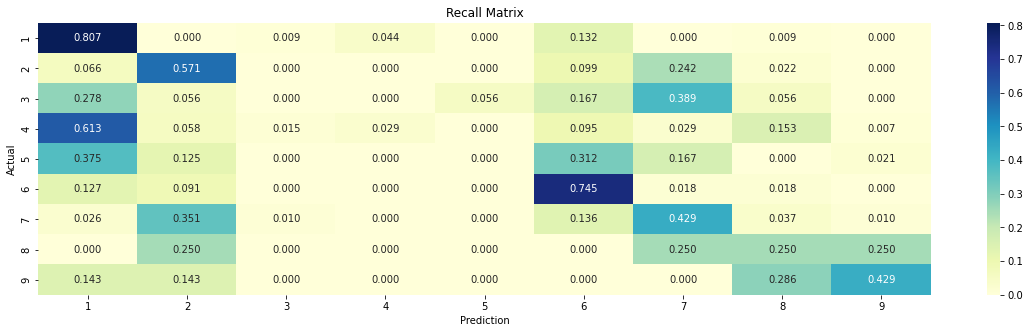

In [29]:
confusion_precision_recall(y_test,xgboost_pred_test)

# Hyperparametre optimization:

In [26]:
def objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 100, log=True)
    n_estimators = trial.suggest_int("n_estimators", 5,500)
    min_samples_split = trial.suggest_int("min_samples_split", 2,32)

    rf = RandomForestClassifier(criterion =criterion,max_depth=max_depth, n_estimators=n_estimators,class_weight=weights)

    score = cross_val_score(rf, X_train, y_train, cv=5,scoring = 'recall_micro')
    accuracy = score.mean()
    return accuracy

In [27]:
#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=15)

In [28]:
#trial = study.best_trial
#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

In [47]:
rf_best = RandomForestClassifier(n_estimators= 550, min_samples_split= 12, max_depth = 20, criterion = 'gini',class_weight=weights)
rf_best.fit(X_train,y_train)

RandomForestClassifier(class_weight={1: 0.6500244738130201,
                                     2: 0.8174823022468451,
                                     3: 4.156494522691705,
                                     4: 0.5375430074883627,
                                     5: 1.5211912943871706,
                                     6: 1.3414141414141414,
                                     7: 0.3872849227179936,
                                     8: 19.674074074074074,
                                     9: 9.837037037037037},
                       max_depth=20, min_samples_split=12, n_estimators=550)

In [ ]:
# rf_best = RandomForestClassifier(n_estimators= 500, min_samples_split= 19, max_depth = 68, criterion = 'gini',class_weight=weights)


In [48]:
rf_test_predict = rf_best.predict(X_test)
rf_test_recall = recall_score(y_test,rf_test_predict,average='micro')
print("Recall score Random Forest :{}".format(rf_test_recall))

Recall score Random Forest :0.6736842105263158


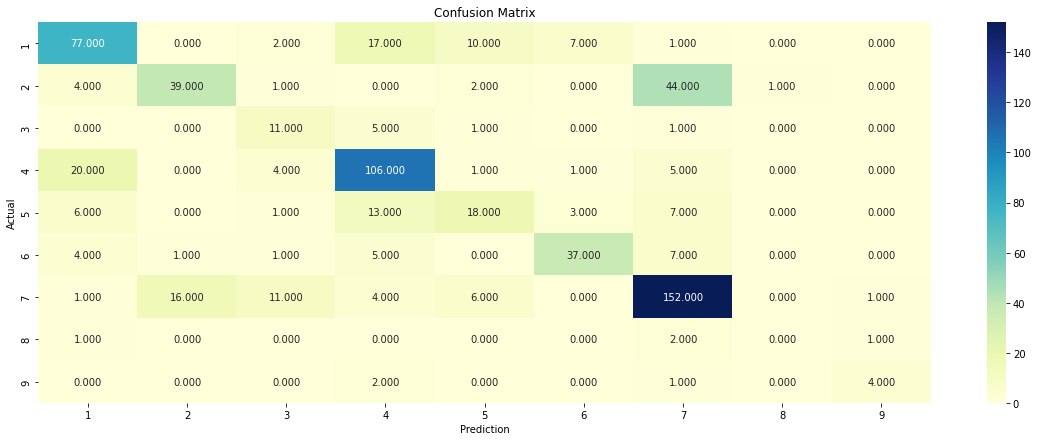

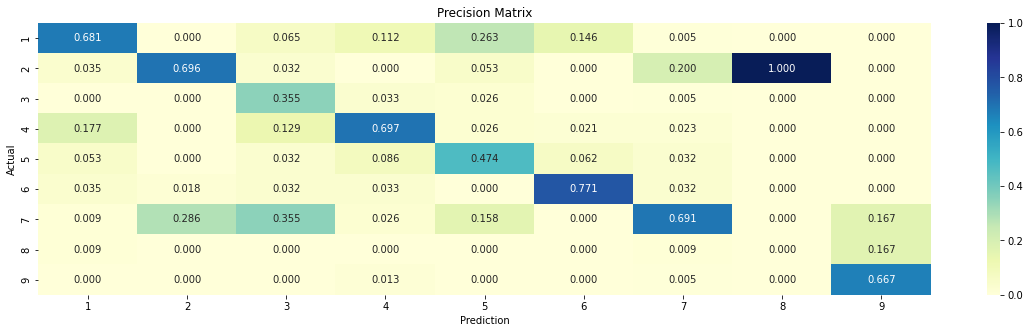

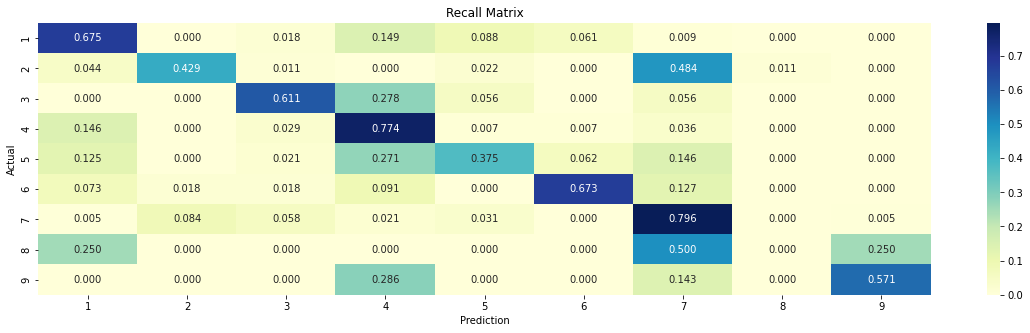

In [32]:
confusion_precision_recall(y_test,rf_test_predict)

# BEST MODEL, RANDOM FOREST: 0.6812 (RECALL)